In [1]:
import os
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def extract(filename):
    return pd.read_csv(filename, sep=',', engine='python', encoding = 'ISO-8859-1')

def read_it(dfs, i, directory, min_cols):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            df = extract(f)
            if df.shape[1] < min_cols:
                min_cols = df.shape[1]
            dfs[i]= df
            i = i+1
        else:
            i, min_cols, dfs = read_it(dfs, i, f, min_cols)
    return i, min_cols, dfs

def read_files(directory, max_kb, min_cols):
    dfs = {}
    i = 0
    i, min_cols, dfs = read_it(dfs, i, directory, min_cols)
    return dfs, min_cols

In [4]:
min_cols = np.inf
dfs, min_cols = read_files('data/romulo/data-lakes/clustering', 0, min_cols)
print(len(dfs))
print(min_cols)

283
4


In [6]:
dfs[1]

,2009r,2010r,2011r,2012r,2013r,2014r,2015p,2011r.1,2012r.1,2013r.1,2014r.1,2015p.1,clazz
0,15156.6,16094.8,17765.9,17745.7,18237.9,18828.1,17519.8,10.4,-0.1,2.8,3.2,-6.9,0.0
1,2198.9,2311.1,2313.3,2153.2,2185.8,2276.6,2399.2,0.1,-6.9,1.5,4.2,5.4,0.0
2,240215.3,252494.3,269508.4,280280.4,293748.1,306883.2,294693.1,6.7,4.0,4.8,4.5,-4.0,0.0
3,2443.1,2708.9,2852.2,2784.7,3341.7,3046.4,2913.4,5.3,-2.4,20.0,-8.8,-4.4,0.0
4,2533.9,2793.9,2940.1,2867.0,3439.8,3148.8,3014.8,5.2,-2.5,20.0,-8.5,-4.3,0.0
5,2611.2,2718.7,-1.0,2584.9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
6,412.3,407.6,-1.0,431.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
7,4732.8,5105.0,5253.4,5020.2,5625.6,5425.4,5414.0,2.9,-4.4,12.1,-3.6,-0.2,0.0
8,90.8,85.0,87.9,82.3,98.1,102.4,101.4,3.4,-6.4,19.2,4.4,-1.0,0.0


In [7]:
# now determine the minimum column numbers and used that to get the principal components for all datasets.
std_slc = StandardScaler()
X_std = {}
for i in range(len(dfs)):
    X_std[i] = std_slc.fit_transform(dfs[i])

pca = decomposition.PCA(n_components=min_cols-1)
X_std_pca = {}
for i in range(len(X_std)):
    X_std_pca[i] = pca.fit_transform(X_std[i])

In [8]:
print(X_std_pca[128].shape)
print(X_std_pca[128])

(24, 3)
[[ 6.70195147  2.7060886  -0.29936957]
 [ 5.96025569  2.9741331   0.7146907 ]
 [ 3.62460811  0.55095051  2.38880393]
 [ 2.84871696  0.49167499 -0.60321596]
 [ 3.07444589  0.47743959 -0.99661853]
 [ 2.82138336 -0.64440451  1.06388871]
 [ 1.03831123 -0.40804878 -2.00716927]
 [ 1.51715483 -1.46770657 -0.02299147]
 [ 0.73160003 -1.76394457 -1.53027702]
 [ 0.65126719 -1.96072024 -0.78202432]
 [-0.29193863 -2.45752765  0.98117447]
 [-0.13191774 -2.02971108  0.38662437]
 [-0.19781513 -2.65472331  2.49831659]
 [-1.52573825 -0.73921161 -1.89641146]
 [-1.26596634 -1.47623179 -0.87335147]
 [-0.95092651 -2.71720539  3.01119332]
 [-1.9234003   1.67387629 -1.56272416]
 [-1.90751803 -0.06558853  0.23898661]
 [-2.36679164  0.5429763  -2.42545712]
 [-2.85910239  0.87993477 -2.23639638]
 [-3.29162559  1.03335771 -0.99457947]
 [-3.48849595  0.33705785  0.11220451]
 [-3.65479292  3.45523939  1.00690672]
 [-5.11366534  3.26229493  3.82779625]]


In [9]:
X_std_pca[1][:,0]

array([ 0.32956375, -1.54030621,  7.868737  , -1.05622995, -1.06209418,
       -0.98509305, -1.01453299, -1.21224656, -1.32779781])

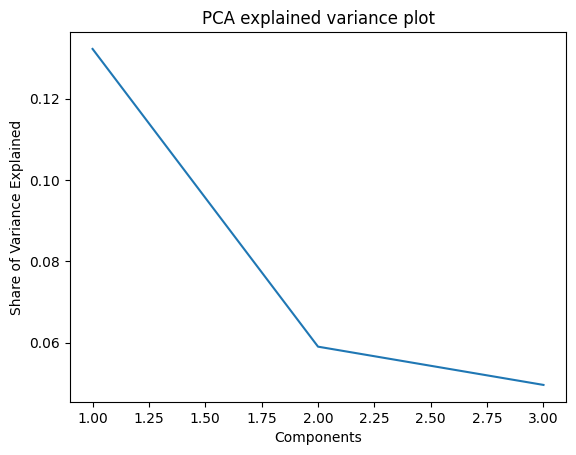

In [10]:
#extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

#create an x for each component
x = np.arange(1,len(explained_variance)+1)
#plot the results
plt.plot(x, explained_variance)
#add a y label
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
#show the resuling plot
plt.show()

In [11]:
#iterate over the components
#to print the explained variance
for i in range(0, min_cols-1):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 13.22% of variance
Component  1 accounts for 5.90% of variance
Component  2 accounts for 4.96% of variance


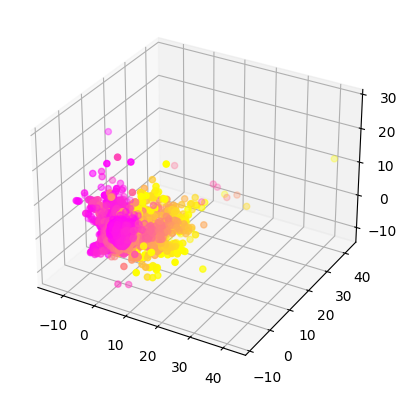

In [12]:
ax = plt.axes(projection='3d')
for i in range(len(X_std_pca)):
    ax.scatter3D(X_std_pca[i][:,0], X_std_pca[i][:,1], X_std_pca[i][:,2], c=X_std_pca[i][:,0], cmap='spring');

In [15]:
X_std_pca[4]

array([[-0.44249   ,  0.06412152,  2.59645324],
       [ 0.06189497, -0.9805266 ,  0.7654068 ],
       [ 1.38342572,  1.13226259, -1.42684126],
       [ 1.38930408,  2.76577784,  0.84321724],
       [ 1.32292455, -1.54057159, -0.06674736],
       [ 0.79583721, -3.15913727, -0.3190053 ],
       [ 1.86817502, -0.66198764,  0.32110834],
       [ 2.29559769,  0.20081236,  0.62414765],
       [ 2.79890249, -1.43235843, -0.27369568],
       [ 3.57238185,  0.55343978,  0.89403387],
       [-2.8814592 ,  0.18872891,  3.36096376],
       [-0.96948522,  2.53629039, -2.53811287],
       [-2.13974734, -0.24207756, -0.04277461],
       [-1.1021352 ,  3.43361615, -0.04109749],
       [-2.0662005 , -1.34203247,  0.37772566],
       [-0.91325383,  2.08444143, -0.16276391],
       [-2.07855826, -3.07065133, -1.33892185],
       [-0.50820744,  0.70365892, -1.33011553],
       [-0.87386325, -0.70706754, -2.1093134 ],
       [-1.51304335, -0.52673946, -0.1336673 ]])

In [126]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6], [7,8]])
c = np.array([[9,10], [11,12]])
d = np.array([[13,14], [15,16]])
arr = [a,b,c,d]

_all = arr[0]
for i in range(1, len(arr)):
    _all = np.concatenate((_all, arr[i]), axis=0)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16]])

In [17]:
_all = X_std_pca[0]
for i in range(1, len(X_std_pca)):
    _all = np.concatenate((_all, X_std_pca[i]), axis=0)
    
_all

array([[ 5.65667025, -0.53552592, -1.50767826],
       [ 4.77294807,  0.31496523, -1.05187095],
       [ 4.68449003,  0.63709291, -0.25742153],
       ...,
       [-0.60696221, -0.65076289,  0.35177121],
       [-0.40182787, -1.24024254, -0.56469563],
       [-0.33533634,  1.24967488,  1.19833831]])

In [19]:
df_res = pd.DataFrame(data = _all, columns = ["C1", "C2", "C3"])

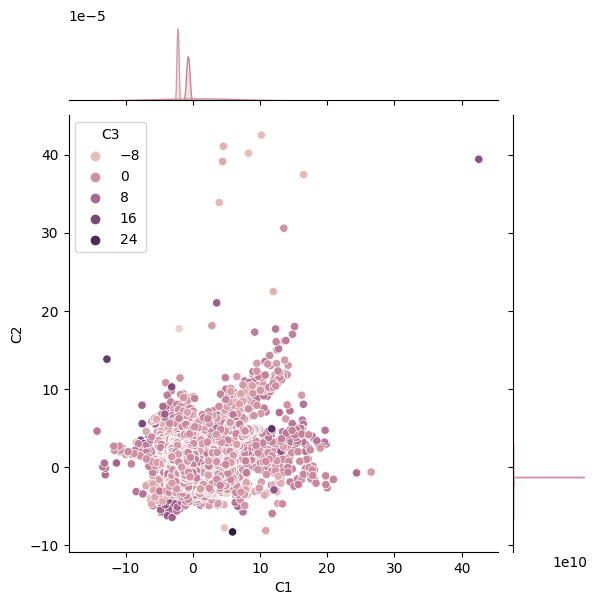

In [21]:
g = sns.jointplot(data = df_res,
                 x = "C1",
                 y = "C2",
                 hue = "C3")